# ✨***Topic Modeling using Latent Semantic Analysis***✨

Это длинное название можно перевести так: ***выделение тем, используя латентно-семантический анализ***.

✨***Над проектом работали:***

* Нечаева Анна Анатольевна,
* Сизиков Григорий Алексеевич,
* Попов Владимир Алексеевич.

✨ ***Целью*** данного проекта является изучение и практическое применение латентно-семантического анализа для выявления тематик текстовых данных. Основной задачей проекта является использование ***LSA*** для создания ***Topic Model*** с целью выявления семантических тем и выделения ключевых концепций в наборе текстов.

In [ ]:
# загрузим тексты, с которыми будем работать

import json
import pandas as pd

ser = pd.read_json("https://raw.githubusercontent.com/kittvnebluda/pla-texts/main/texts.json", typ="series")

df = pd.DataFrame({"text": ser})

# уберем все кроме букв
df["clean"] = df["text"].str.replace("[^а-яА-Я ]", "", regex=True)

# убираем слова от трех букв и меньше
df["clean"] = df["clean"].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

# занизим все заглавные буквы
df["clean"] = df["clean"].apply(lambda x: x.lower())

df

,text,clean
AI_1,Обзорная статья об Искусственном Интеллекте (д...,обзорная статья искусственном интеллекте далее...
AI_2,"Из статьи вы узнаете, что такое искусственный ...",статьи узнаете такое искусственный интеллект п...
AI_3,Искусственный интеллект (ИИ) и Интернет вещей ...,искусственный интеллект интернет вещей предста...
AI_4,Благодаря бурным темпам развития цифровых техн...,благодаря бурным темпам развития цифровых техн...
AI_5,Искусственный интеллект (ИИ) становится неотъе...,искусственный интеллект становится неотъемлемо...
economics_1,В данной статье проводится всесторонний анализ...,данной статье проводится всесторонний анализ т...
economics_2,"В данной статье рассмотрено явление, которое п...",данной статье рассмотрено явление которое полу...
economics_3,В данной статье рассматривается понятие эконом...,данной статье рассматривается понятие экономич...
economics_4,В данной статье рассматривается значение малог...,данной статье рассматривается значение малого ...
economics_5,Коррупция является поистине неоднозначным проц...,коррупция является поистине неоднозначным проц...


Как можно заметить, мы имеем 20 текстов на русском на темы: искусственный интеллект, экономика, медицина, космос.

## ✨***Что такое латентно-семантический анализ (ЛСА | LSA) и зачем он нужен?***✨

Все языки имеют свои тонкости и нюансы, которые довольно сложно уловить машине (иногда они даже непонятны нам, людям). Сюда можно отнести разные слова, которые означают одно и то же, а также слова, которые пишутся одинаково, но имеют разное значение.


Например, рассмотрим следующие два предложения:


    Непреступный замок на обрыве берут голодом.
    Этот замок никому не открыть.


В первом предложении слово "замок" относится к строению, а во втором - означает, ну, замок.

Мы легко различаем эти слова, потому что способны понять контекст, лежащий в основе этих слов. И как же нам донести его до машины? Именно здесь на помощь приходит *латентный-семантический анализ (LSA)*, который пытается использовать контекст вокруг слов для выявления тем.

Таким образом, простое сопоставление слов с документами не поможет. Что нам действительно нужно, так это определить темы, стоящие за словами. ***LSA*** - одна из таких техник, которая позволяет найти эти ***скрытые темы***.

✨ ***Латентно-семантический анализ*** -- метод обработки информации на естественном языке, анализирующий взаимосвязь между библиотекой документов и терминами, в них встречающимися, и выявляющий характерные факторы (тематики), присущие всем документам и терминам. Например, группа слов, таких как "галактика", "квазар", "звезда", будет соответствовать теме "космос". Один документ может содержать в себе несколько тем.

Применяется для кластеризации документов, организации доступного онлайн контента, а также


*   для фильтрации большого количества резюме, что существенно упрощает задачу отбора наиболее подходящих кандидатов;
*   для оптимизации поиска: можно для каждой статьи выделить тематику и ключевые слова, по которым ее легко найти;
*   для повышения качества рекомандаций;
*   в области здравоохранения возможно применение для выделения важной информации из неструктурированных отчетов.

## ✨***TF-IDF (term frequency–inverse document frequency)***✨

***

✨***TF-IDF*** - это мера важности слова для документа.

В названии ***TF-IDF*** объединены 2 термина:

***TF (Частота термина)*** -- обозначает, насколько часто определенное слово появляется в данном документе. Таким образом, ***TF*** измеряет важность слова в контексте отдельного документа.

***IDF (Обратная частота документа)*** измеряет, насколько уникально слово по всей коллекции документов. Слова, которые появляются в большинстве документов имеют низкое ***IDF***, так как они не несут большой информационной ценности.

***Формула вычисления TF-IDF:***
$$
TF\text{-}IDF(t, d)=TF(t, d) \cdot IDF(t),
$$

$$
TF(t, d) = \frac{n_t}{\sum \limits_k n_k},
$$
где $n_t$ есть число вхождений слова $t$ в документ, а в знаменателе -- общее число слов в данном документе.
$$
IDF(t, D) = \log \frac{|D|}{|\{ d_i \in D \, | \, t \in d_i \} | },
$$
где $|D|$ -- число документов в коллекции;

$|\{ d_i \in D \, | \, t \in d_i \} |$ -- число документов из коллекции $D$, в которых встречается $t$.
***
✨ *Пример расчета TF-IDF*

Пусть у нас есть 3 документа:

1. "Ясной ночью Иван наконец смог остаться наедине со своими мыслями и полюбоваться звездным небом."
2. "Иван вернулся домой и почувствовал нарастающую тоску."
3. "Яркий солнечный, стремительно ворвавшийся в комнату, ослепил мои еще не ясно ощущающие этот мир глаза."

Рассчитаем TF-IDF для слова "Иван":

* для начала вычислим TF для каждого документа, в котором встречается это слово, в первом документе всего 14 слов, во втором -- 7, термин "Иван" в каждом из них встречается 1 раз, тогда
   $$TF_1 = \frac{1}{14},$$

   $$TF_2 = \frac{1}{7};$$

* теперь найдем IDF: всего у нас 3 документа в коллекции, искомое слово встречается в 2 из них, тогда
$$IDF = \log \frac{3}{2};$$

* теперь расчитаем важность слова для каждого из тех документов, в которых оно встречается:

$$TF\text{-}IDF_1 = TF_1 \cdot IDF = \frac{1}{14} \cdot \log \frac{3}{2} \simeq 0.013,$$

$$TF\text{-}IDF_2 = TF_2 \cdot IDF = \frac{1}{7} \cdot \log \frac{3}{2} \simeq 0.025.$$

Заметим, что важность слова "Иван" выше для документа, в котором слов меньше, то есть, где оно встречается на 7 слов, а не на 14, как в первом документе.

***

✨*Большой вес в TF-IDF получат слова с высокой частотой в пределах конкретного документа и с низкой частотой употребления в других документах.*

***
Мера TF-IDF используется для представления документов коллекции в виде числовых векторов, отражающих важность использования каждого слова из некоторого набора слов в каждом документе. Подобная модель называется векторной моделью и дает возможность сравнивать тексты, основываясь на применении какой-либо метрики (евклидово расстояние, манхэттенскае расстояние, расстояние Чебышёва и др.): чем выше показатель TF-IDF, тем реже встречается слово, и наоборот.

***
Просто получить TF-IDF можно с помощью языка программирования *python* и библиотеки *sklearn*.
***

## ✨***Реализации ЛСА***✨

Допустим, у нас есть $m$ текстовых документов с $n$ количеством уникальных слов. Мы хотим извлечь $k$ тем из всех текстовых данных в документах.
***

1. Для начала нужно создать document-term (документ-термин) матрицу размерности $m× n$ заполненную TF-IDF мерами:

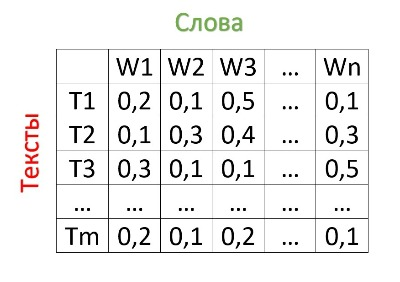

***

In [ ]:
# создадим doc-term матрицу с помощью sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df = 0.3,
                        smooth_idf=True)

X = tfidf.fit_transform(df['clean'])

X.shape # проверим размерность document-term матрицы

(20, 7426)

***
2. Затем, используя сингулярное разложение (SVD), сократим размерность вышеуказанной матрицы до $k$ (количество желаемых тем), избавившись от лишних столбцов, строк и сингулярных чисел.
***

>✨***SVD (сингулярное разложение)*** -- декомпозиция вещественной матрицы с целью ее приведения к каноническому виду.

> У любой матрицы $A$ размера $n \times m$ существует разложение на матрицы $U$, $S$, $V^T$:

> $A_{n \times m} = U_{n \times n} \times S_{n \times m} \times V^T_{m \times m}$.

>При этом, матрицы $U_{n \times n}$ и $V_{m \times m}$ являются ортогональными, а матрица $S_{n \times m}$ -- диагональной, $S_{n \times m} = diag (\sqrt{\lambda_1}, \sqrt{\lambda_2}, ..., \sqrt{\lambda_n})$,

>где $\lambda_i \geq 0$ -- собственные значения матриц $A^TA$ и $AA^T$, $\sqrt{\lambda_i}$ -- сингулярные числа матрицы $A$.
>
> Возможно получить *усеченное разложение*, оставив только первые (наибольшие) $k$ сингулярных чисел.
Тогда у матриц $U$ останутся только первые $k$ столбцов, у матрицы $V$ - первые $k$ строчек, а матрица $S$ станет квадратной размера $k \times k$.

>$A'_{n \times m} = U'_{n \times k} \times S'_{k \times k} \times V'^T_{k \times m}$

> Матрица $A'$ с достаточно высокой точностью приближает исходную матрицу $A$, будучи наилучшим низкоранговым приближением с точки зрения средне-квадратичного отклонения.

>Имеенно такое важное свойство $SVD$ позволяет применяеть его для проведения латентно-семантического анализа.

***
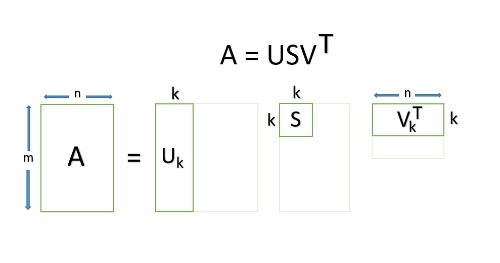

***

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(
    n_components=4,       # тексты разделены на 4 темы, так что мы уменьшим матрицу соответственно
    n_iter=100,           # количество итераций для рандомизированного SVD-решателя
    random_state=4221)    # seed для генератора рандомных чисел, чтобы результат был постоянный

svd_model.fit(X)

len(svd_model.components_)

4

***
✨Компоненты ***svd_model*** - это наши темы, и мы можем получить к ним доступ с помощью ***svd_model.components_***. Наконец, давайте выведем несколько наиболее важных слов в каждой из 4 тем и посмотрим, как работает наша модель.
***

In [ ]:
terms = tfidf.get_feature_names_out()

for i, comp in enumerate(svd_model.components_, start=1):

    terms_comp = zip(terms, comp)

    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:5]

    print("Тема " + str(i), end=": ")

    for t in sorted_terms: print(t[0], end=" ")

    print()

Тема 1: звезд звезды эволюции двойных массы 
Тема 2: искусственного интеллекта интеллект искусственный электронной 
Тема 3: пациентов калия печени больных сердца 
Тема 4: коррупция малого экономики среднего экономических 


***
✨Программа извлекла "особые" слова, и мы можем явно выделить четыре темы в двадцати документах: космос, искусственный интеллект, медицина, экономика.

✨Работает!!!✨
***

***
## ⭐ Поэкспериментируем ⭐
***

Можно вывести побольше слов и увидеть как темы "перемешиваются". Слова сортируются от большего TF-IDF до меньшего:
***

In [ ]:
for i, comp in enumerate(svd_model.components_, start=1):
    sorted_terms = sorted(zip(terms, comp), key=lambda x: x[1], reverse=True)[:20]
    print("Тема " + str(i), end=": ")
    for t in sorted_terms: print(t[0], end=" ")
    print()

Тема 1: звезд звезды эволюции двойных массы движений линии галактики элементов масса солнца массивных вещества собственных ядра гелия звезда координат искусственного рентгеновские 
Тема 2: искусственного интеллекта интеллект искусственный электронной пациентов коммерции технологиях обучения технологии умных вещей клиентов человека медицинских интернет обучение автоматизации открывает коррупция 
Тема 3: пациентов калия печени больных сердца заболевания функции снижение миокарда легких пациенты гиперкалиемии пациента медиана хснсфв типу данным паллиативной помощь составила 
Тема 4: коррупция малого экономики среднего экономических невидимой руки экономической система предпринимательства рынка коррупции рисков государства бизнеса экономическая общества отношений ресурсов производства 


***
Можем поиграть с параметрами TruncatedSVD. Например, при меньшем количестве итераций (5) ничего не изменилось. До этого было 100.
***

In [ ]:
svd_model = TruncatedSVD(n_components=4, n_iter=5, random_state=4221)
svd_model.fit(X)

for i, comp in enumerate(svd_model.components_, start=1):
    sorted_terms = sorted(zip(terms, comp), key=lambda x: x[1], reverse=True)[:5]
    print("Тема " + str(i), end=": ")
    for t in sorted_terms: print(t[0], end=" ")
    print()

Тема 1: звезд звезды эволюции двойных массы 
Тема 2: искусственного интеллекта интеллект искусственный электронной 
Тема 3: пациентов печени больных сердца калия 
Тема 4: коррупция малого среднего экономики коррупции 


***
## ⭐ Визуализация с помощью PCA ⭐
***

Человеку проще воспринимать некоторые данные визуально. Ещё лучше, когда можно что-то пропустить через несколько путей восприятия. К сожалению, мы находимся в трёхмерном пространстве и представить структуру большей размерность нам сложно, а доподлинно построить невозможно. Зато можно сжать многомерный объект до воспринимаемой размерности, главной задачей становиться минимальная потеря информации и сохранение основополагающих свойств объекта.

Метод анализа главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных. Метод был разработан Карлом Пирсоном в 1901 году.

Существует 4 основных версии постановки задачи анализа главных компонент:
1.	аппроксимировать данные линейными многообразиями меньшей размерности;
2.	найти подпространства меньшей размерности, в ортогональной проекции на которые разброс данных (то есть среднеквадратичное отклонение от среднего значения) максимален;
3.	найти подпространства меньшей размерности, в ортогональной проекции на которые среднеквадратичное расстояние между точками максимально;
4.	для данной многомерной случайной величины построить такое ортогональное преобразование координат, в результате которого корреляции между отдельными координатами обратятся в нуль.

Каждая из задач приводит к задаче диагонализации ковариантной матрицы или выборочной ковариантной матрицы. Выборочная ковариационная матрица, это
$$
C=\{c_{ij}\}:\:c_{ij}=\frac{1}{m-1}\sum^m_{k=1}(x_{ki}-\overline{X}_i)(x_{kj}-\overline{X}_j).
$$
Ковариационная матрица многомерной случайной величины $X$, это
$$
\Sigma=\{\sigma_{ij}\}:\:\sigma_{ij}=\text{cov}(X_i,X_j)=E[(X_i-E[X_i])(X_j-E[X_j])].
$$
В тех случаях, когда спектр ковариантной матрицы вырожден, произвольно выбирают ортонормированный базис собственных векторов. Такой базис всегда существует, и собственные числа ковариантной матрицы вещественны и не меньше нуля.

Вводится матрица преобразования данных к главным компонентам, далее $А$. Она состоит из векторов главных компонент, которые расположены в порядке убывания собственных значений:
$$
A=\{a-1,...,a_n\}^T,
$$
при этом $AA^T=1$.

Матрица $А$ является ортогональной. Основная часть вариации данных сосредотачивается в первых координатах, и это часто позволяет перейти к пространству меньшей размерности.

Подход оценки числа главных компонент по необходимой доле объяснённой дисперсии по сути применим всегда, но он предполагает, что нет разделения на «сигнал» и «шум», и заранее заданная точность всегда имеет смысл. Часто пользуются другой методикой, основанной на гипотезе о наличии «сигнала» (сравнительно малая размерность, относительно большая амплитуда) и «шума» (большая размерность, относительно малая амплитуда).
Рассматриваемый метод работает как фильтр, сигнал содержится преимущественно в первых главных компонентах, при этом влияние остальных компонент меньше, а процент шума в них больше. Возникает очень важный вопрос: как оценивать количество нужных главных компонент, в условиях известного соотношения сигнала и шума. Самым простым и старым методом является правило Кейзера. По данному правилу значимы те главные компоненты, которые удовлетворяют условию:
$$
\lambda_i>\frac{1}{n}\text{tr}\:C,
$$
то есть $\lambda_i$ превосходит среднее значение выборочной дисперсии координат вектора данных. Это самый простой и распространённый метод. Но бывают случаи в которых он даёт слишком много значимых главных компонент.

Существуют другие распространённые более продвинутые и универсальные методы оценки, такие как правило сломанной трости и метод оценки по числу обусловленности.

После выбора главных компонент и проецирования на первые $k$ главных компонент удобно выполнить нормировку на единичную дисперсию по осям. Дисперсия вдоль итой главной компоненты равна:
$$
\lambda_i>0\:(1\le i\le k),
$$
и для нормирования нужно разделить соответствующую координату на $\sqrt{\lambda_i}$. Такое преобразование не ортогонально и не сохраняет скалярное произведение. После нормировки ковариационная матрица проекции данных становится единичной, проекции на два любых ортогональных направления становятся независимыми величинами, и каждый ортонормированный базис становится базисом главных компонент. Вместе с нормировкой отображение из исходного пространства данных на первые $k$ главных компонент задаётся матрицей:
$$
K=\Bigg\{\frac{a_1}{\sqrt{\lambda_1}},\frac{a_2}{\sqrt{\lambda_2}},...,\frac{a_k}{\sqrt{\lambda_k}}\Bigg\}^T.
$$

Именно это преобразование чаще всего называется преобразованием Кархунена — Лоэва.

Встречается нормировка до вычисления главных компонент. Она позволяет обоснованно выбирать метрику, в которой будет вычисляться наилучшая аппроксимация данных, или будут искаться направления наибольшего разброса. Предварительная нормировка не заменяет нормировку после вычисления главных компонент, её надо будет проводить отдельно.

Области применения метода:
1. визуализация данных;
2. компрессия изображений и видео;
3. подавление шума на изображениях;
4. индексация видео;
5. сокращение размерности динамических моделей;
6. сенсорная оценка пищевых продуктов.

Так же иногда применяется в таких областях как Биоинформатика, Хемометрика, Психодиагностика, Эконометрика, Социология, Политология.

Метод главных компонент применим всегда. Однако метод не всегда эффективно снижает размерность при заданных ограничениях на точность. Прямые и плоскости не всегда обеспечивают хорошую аппроксимацию. Например, если данные с очень хорошей точностью следуют какой-то кривой, сложно расположенной в пространстве, тогда метод главных компонент для приемлемой точности потребует в место одной компоненты несколько. В такой ситуации может вообще не произойти снижение размерности. Для таких случаев разработан метод главных многообразий.


Мы можем попытаться визуализировать как наши тексты кластеризировалились благодаря tfidf и doc-term матрицы с помощью PCA. Не будем ничего изобретать и воспольземся готовеньким, а именно библиотекой sklearn, в которой уже реализовал PCA.

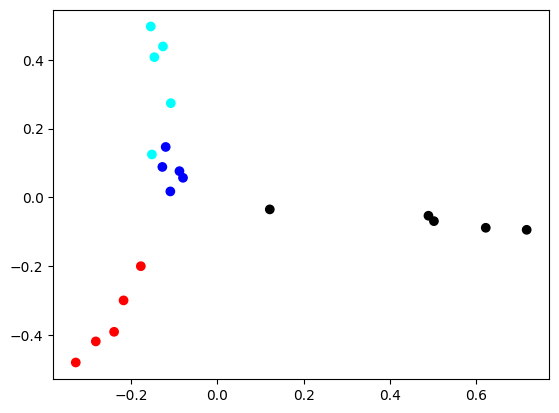

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

colors = [*["red"]*5, *["blue"]*5, *["cyan"]*5, *["black"]*5]

X_topics = svd_model.fit_transform(X)

pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(X_topics)

plt.scatter(XPCAreduced[:, 0], XPCAreduced[:, 1], c=colors)

Цвета - темы. Мы уменьшили четырехмерное пространство четырех тем до двухмерного. Кластеризацию можно увидеть невооруженным глазом. Она не супер четкая,  возможно, библиотечный дело в библиотечном методе (он автоматически проецирует на оси, максимизирующие дисперсию, что не всегда рационально), или тексты не очень отличаются по наполнению.

***
## ⭐Заключение ⭐

Мы успешно применили ЛСА для выделения четырех тем из двадцати текстов и даже визуализировали получившуюся кластеризацию. Латентно-семантический анализ сработал великолепно, можно отлично видеть темы текстов по особым словам.

ЛСА работает быстро и очень легко реализуется. С другой стороны ЛСА предполагает гауссовское распределение слов в тестах, что может быть справедливо не для всех задач.
***

## ✨ C наступающим!

*Пусть вектор радости направлен вдоль оси успеха, а матрица здоровья остается симметричной и положительно определенной. Пусть каждый базисный вектор вашей жизни приносит вам радость и процветание в новом году!*